# Bank Data Marketing Project

In [1]:
import pandas as pd
import numpy as np
import scipy.stats


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler

import joblib
import pickle

In [2]:
bank_data_ad = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 7\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv")
bank_data = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 7\bank+marketing\bank\bank-full.csv")

In [3]:
bank_data["poutcome"].max()

'unknown'

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_data_ad.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
def data_inspection(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [7]:
data_inspection(bank_data)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
age,0,0,0.0,77,int64
job,0,0,0.0,12,object
marital,0,0,0.0,3,object
education,0,0,0.0,4,object
default,0,0,0.0,2,object
balance,0,0,0.0,7168,int64
housing,0,0,0.0,2,object
loan,0,0,0.0,2,object
contact,0,0,0.0,3,object
day,0,0,0.0,31,int64


In [8]:
data_inspection(bank_data_ad)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
age,12,0,0.0,78,int64
job,12,0,0.0,12,object
marital,12,0,0.0,4,object
education,12,0,0.0,8,object
default,12,0,0.0,3,object
housing,12,0,0.0,3,object
loan,12,0,0.0,3,object
contact,12,0,0.0,2,object
month,12,0,0.0,10,object
day_of_week,12,0,0.0,5,object


## Data Pre-Processing

#### Removing Null Values and Duplicate Values

In [9]:
bank_data_ad = bank_data_ad.drop_duplicates()

In [10]:
data_inspection(bank_data_ad)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
age,0,0,0.0,78,int64
job,0,0,0.0,12,object
marital,0,0,0.0,4,object
education,0,0,0.0,8,object
default,0,0,0.0,3,object
housing,0,0,0.0,3,object
loan,0,0,0.0,3,object
contact,0,0,0.0,2,object
month,0,0,0.0,10,object
day_of_week,0,0,0.0,5,object


In [11]:
data_inspection(bank_data)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
age,0,0,0.0,77,int64
job,0,0,0.0,12,object
marital,0,0,0.0,3,object
education,0,0,0.0,4,object
default,0,0,0.0,2,object
balance,0,0,0.0,7168,int64
housing,0,0,0.0,2,object
loan,0,0,0.0,2,object
contact,0,0,0.0,3,object
day,0,0,0.0,31,int64


In [12]:
bank_data_ad.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [13]:

# Separate the majority and minority classes
no_class = bank_data[bank_data['y'] == 'no']
yes_class = bank_data[bank_data['y'] == 'yes']

# Upsample the minority class (yes) to match the majority class (no)
data_upsampled = resample(yes_class, replace=True, n_samples=len(no_class), random_state=42)

# Combine the upsampled 'yes' class with the original 'no' class
balanced_data = pd.concat([no_class, data_upsampled])

In [14]:
# Separate the majority and minority classes
no_class_ad = bank_data_ad[bank_data_ad['y'] == 'no']
yes_class_ad = bank_data_ad[bank_data_ad['y'] == 'yes']

# Upsample the minority class (yes) to match the majority class (no)
data_upsampled_ad = resample(yes_class_ad, replace=True, n_samples=len(no_class_ad), random_state=42)

# Combine the upsampled 'yes' class with the original 'no' class
balanced_data_ad = pd.concat([no_class_ad, data_upsampled_ad])

In [15]:
bank_data8 = balanced_data
bank_data_ad8 = balanced_data_ad

## Assessing Skewness and Kurtosis of Data

In [16]:
def data_statistics(df):
    statistics = []
    
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for column in numeric_columns:
        summary_stats = df[column].describe()
        skewness = df[column].skew()
        kurt = df[column].kurtosis()
        
        statistics.append({
            "Column": column,
            "Mean": summary_stats['mean'],
            "Std": summary_stats['std'],
            "Min": summary_stats['min'],
            "25%": summary_stats['25%'],
            "50%": summary_stats['50%'],
            "75%": summary_stats['75%'],
            "Max": summary_stats['max'],
            "Skewness": skewness,
            "Kurtosis": kurt
        })
    
    return pd.DataFrame(statistics)

In [17]:
data_statistics(bank_data8)

,Column,Mean,Std,Min,25%,50%,75%,Max,Skewness,Kurtosis
0,age,41.278343,11.931140,18.0,32.0,39.0,49.0,95.0,0.830084,0.523048
1,balance,1560.964681,3217.514239,-8019.0,123.0,557.0,1757.0,102127.0,8.002689,129.560584
2,day,15.523158,8.402983,1.0,8.0,15.0,21.0,31.0,0.127174,-1.059363
3,duration,378.394620,348.680860,0.0,143.0,259.0,507.0,4918.0,2.102201,7.034606
4,campaign,2.487989,2.654505,1.0,1.0,2.0,3.0,63.0,5.202042,46.845684
5,pdays,52.574094,109.178244,-1.0,-1.0,-1.0,68.0,871.0,2.364278,6.192085
6,previous,0.839136,2.448042,0.0,0.0,0.0,1.0,275.0,23.306882,2050.097337


In [18]:
data_statistics(bank_data_ad8)

,Column,Mean,Std,Min,25%,50%,75%,Max,Skewness,Kurtosis
0,age,40.359499,12.031591,17.000,31.000,38.000,48.000,98.000,0.983943,1.076220
1,duration,387.386375,361.879025,0.000,144.000,265.000,526.000,4918.000,2.306671,9.346105
2,campaign,2.338930,2.371238,1.000,1.000,2.000,3.000,56.000,4.940679,42.735550
3,pdays,887.566234,313.438017,0.000,999.000,999.000,999.000,999.000,-2.457332,4.038752
4,previous,0.311315,0.690286,0.000,0.000,0.000,0.000,7.000,2.804043,9.613350
5,emp.var.rate,-0.499457,1.725742,-3.400,-1.800,-0.100,1.400,1.400,-0.146905,-1.553040
6,cons.price.idx,93.474135,0.633344,92.201,92.893,93.444,93.994,94.767,-0.111850,-0.966099
7,cons.conf.idx,-40.170349,5.376611,-50.800,-42.700,-41.800,-36.400,-26.900,0.341368,-0.453751
8,euribor3m,2.961638,1.890430,0.634,1.244,4.021,4.959,5.045,-0.018735,-1.922079
9,nr.employed,5135.564725,86.789846,4963.600,5076.200,5191.000,5228.100,5228.100,-0.421689,-1.200678


In [19]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    scipy.stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [20]:
def find_outliers_iqr(df, threshold=1.5):
    outliers = {}
    
    for column in df.columns:
        try:
            numeric_data = pd.to_numeric(df[column])
            
            Q1 = np.percentile(numeric_data, 25)
            Q3 = np.percentile(numeric_data, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outlier_indices = np.where((numeric_data < lower_bound) | (numeric_data > upper_bound))[0]
            
            outliers[column] = {
                'count': len(outlier_indices),
                'indices': outlier_indices
            }
        except ValueError:
            pass  # Skip non-numeric columns
    
    return outliers

In [21]:
find_outliers_iqr(bank_data)

{'age': {'count': 487,
  'indices': array([29158, 29261, 29263, 29322, 29865, 30225, 30264, 30908, 31051,
         31052, 31055, 31057, 31069, 31077, 31089, 31099, 31101, 31108,
         31116, 31125, 31130, 31145, 31149, 31151, 31183, 31189, 31233,
         31255, 31261, 31285, 31341, 31365, 31383, 31393, 31395, 31414,
         31447, 31527, 31569, 31647, 31723, 31816, 32009, 32032, 32064,
         32068, 32074, 32089, 32105, 32160, 32204, 32321, 32451, 32689,
         32699, 32802, 33017, 33360, 33414, 33455, 33699, 33706, 33710,
         33719, 33729, 33751, 33752, 33766, 33775, 33777, 33780, 33803,
         33810, 33811, 33815, 33827, 33846, 33860, 34128, 40363, 40367,
         40368, 40374, 40381, 40383, 40389, 40401, 40402, 40412, 40471,
         40481, 40515, 40524, 40526, 40538, 40561, 40569, 40571, 40584,
         40586, 40595, 40621, 40645, 40655, 40657, 40674, 40676, 40688,
         40699, 40702, 40710, 40712, 40726, 40732, 40759, 40766, 40786,
         40789, 40792, 40816, 

In [22]:
find_outliers_iqr(bank_data_ad)

{'age': {'count': 468,
  'indices': array([27705, 27749, 27772, 27792, 27794, 27797, 27800, 27802, 27803,
         27804, 27805, 27806, 27807, 27808, 27809, 27810, 27818, 27829,
         27830, 27836, 27843, 27867, 27871, 27894, 27922, 27942, 27943,
         27955, 28212, 28213, 28304, 28448, 28495, 28521, 28531, 28577,
         28610, 28723, 28764, 29216, 29254, 29489, 29616, 29659, 29673,
         29964, 29968, 29972, 29978, 29981, 29991, 29995, 29997, 30063,
         30069, 30070, 30079, 30094, 30101, 30124, 30162, 30205, 30216,
         30218, 30232, 30325, 30326, 30381, 30421, 30451, 30580, 35823,
         35838, 35846, 35868, 35963, 36173, 36275, 36301, 36373, 36374,
         36806, 36987, 37125, 37126, 37159, 37175, 37179, 37181, 37182,
         37184, 37195, 37196, 37202, 37208, 37216, 37224, 37226, 37228,
         37246, 37249, 37305, 37330, 37344, 37360, 37392, 37443, 37444,
         37461, 37468, 37482, 37494, 37498, 37501, 37514, 37521, 37534,
         37557, 37559, 37575, 

In [23]:
scaled_columns_df

NameError: name 'scaled_columns_df' is not defined

In [24]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Create a list of numerical columns to be scaled
columns_to_standardise = ["duration", "pdays", "previous", "campaign", "balance"]

# Get the columns to scale and scale them
bank_data_columns = bank_data8[columns_to_standardise]
scaled_data = scaler.fit_transform(bank_data_columns)

# Create a DataFrame with scaled columns
scaled_columns_df = pd.DataFrame(scaled_data, columns=columns_to_standardise)

# Drop the columns to be scaled from the original DataFrame
bank_data8.drop(columns=columns_to_standardise, inplace=True)

In [25]:
scaled_columns_df

,duration,pdays,previous,campaign,balance
0,0.005495,0.000000,0.0,-0.5,0.970624
1,-0.296703,0.000000,0.0,-0.5,-0.323133
2,-0.502747,0.000000,0.0,-0.5,-0.339657
3,-0.458791,0.000000,0.0,-0.5,0.580783
4,-0.167582,0.000000,0.0,-0.5,-0.340269
...,...,...,...,...,...
79839,-0.087912,2.797101,1.0,0.0,1.693390
79840,0.552198,0.000000,0.0,1.0,0.037944
79841,0.741758,0.000000,0.0,-0.5,2.076499
79842,0.186813,0.000000,0.0,-0.5,0.468788


In [26]:
bank_data8.drop(columns = {"level_0", "index"})

KeyError: "['index', 'level_0'] not found in axis"

In [28]:
bank_data8 = bank_data8.reset_index()
bank_data_final

NameError: name 'bank_data_final' is not defined

In [29]:
# Concatenate the scaled columns DataFrame with the original DataFrame
bank_data_final = pd.concat([bank_data8, scaled_columns_df], axis=1)

In [30]:
bank_data_final

,level_0,index,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,duration,pdays,previous,campaign,balance
0,0,0,58,management,married,tertiary,no,yes,no,unknown,5,may,unknown,no,0.005495,0.000000,0.0,-0.5,0.970624
1,1,1,44,technician,single,secondary,no,yes,no,unknown,5,may,unknown,no,-0.296703,0.000000,0.0,-0.5,-0.323133
2,2,2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,unknown,no,-0.502747,0.000000,0.0,-0.5,-0.339657
3,3,3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,unknown,no,-0.458791,0.000000,0.0,-0.5,0.580783
4,4,4,33,unknown,single,unknown,no,no,no,unknown,5,may,unknown,no,-0.167582,0.000000,0.0,-0.5,-0.340269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,79839,40987,76,retired,married,primary,no,no,no,cellular,13,aug,failure,yes,-0.087912,2.797101,1.0,0.0,1.693390
79840,79840,9441,38,management,single,tertiary,no,yes,no,unknown,6,jun,unknown,yes,0.552198,0.000000,0.0,1.0,0.037944
79841,79841,27023,31,admin.,single,secondary,no,yes,no,cellular,21,nov,unknown,yes,0.741758,0.000000,0.0,-0.5,2.076499
79842,79842,39774,33,management,married,tertiary,no,no,no,cellular,1,jun,unknown,yes,0.186813,0.000000,0.0,-0.5,0.468788


In [31]:
label_encoder = LabelEncoder()

bank_data_final['marital'] = label_encoder.fit_transform(bank_data_final['marital'])
bank_data_final['education'] = label_encoder.fit_transform(bank_data_final['education'])
bank_data_final['month'] = label_encoder.fit_transform(bank_data_final['month'])
bank_data_final['contact'] = label_encoder.fit_transform(bank_data_final['contact'])
bank_data_final['poutcome'] = label_encoder.fit_transform(bank_data_final['poutcome'])
bank_data_final['job'] = label_encoder.fit_transform(bank_data_final['job'])

In [32]:
bank_data_final

,level_0,index,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,duration,pdays,previous,campaign,balance
0,0,0,58,4,1,2,no,yes,no,2,5,8,3,no,0.005495,0.000000,0.0,-0.5,0.970624
1,1,1,44,9,2,1,no,yes,no,2,5,8,3,no,-0.296703,0.000000,0.0,-0.5,-0.323133
2,2,2,33,2,1,1,no,yes,yes,2,5,8,3,no,-0.502747,0.000000,0.0,-0.5,-0.339657
3,3,3,47,1,1,3,no,yes,no,2,5,8,3,no,-0.458791,0.000000,0.0,-0.5,0.580783
4,4,4,33,11,2,3,no,no,no,2,5,8,3,no,-0.167582,0.000000,0.0,-0.5,-0.340269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,79839,40987,76,5,1,0,no,no,no,0,13,1,0,yes,-0.087912,2.797101,1.0,0.0,1.693390
79840,79840,9441,38,4,2,2,no,yes,no,2,6,6,3,yes,0.552198,0.000000,0.0,1.0,0.037944
79841,79841,27023,31,0,2,1,no,yes,no,0,21,9,3,yes,0.741758,0.000000,0.0,-0.5,2.076499
79842,79842,39774,33,4,1,2,no,no,no,0,1,6,3,yes,0.186813,0.000000,0.0,-0.5,0.468788


In [33]:
def map_boolean_columns_to_binary(df):
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) == 2 and "yes" in unique_values and "no" in unique_values:
            df[column] = df[column].map({"no": 0, "yes": 1})
    return df

In [34]:
bank_data_final_1 = map_boolean_columns_to_binary(bank_data_final)

In [35]:
bank_data_final_1 = bank_data_final_1.drop(columns = {"level_0", "index"})
bank_data_final_1

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,duration,pdays,previous,campaign,balance
0,58,4,1,2,0,1,0,2,5,8,3,0,0.005495,0.000000,0.0,-0.5,0.970624
1,44,9,2,1,0,1,0,2,5,8,3,0,-0.296703,0.000000,0.0,-0.5,-0.323133
2,33,2,1,1,0,1,1,2,5,8,3,0,-0.502747,0.000000,0.0,-0.5,-0.339657
3,47,1,1,3,0,1,0,2,5,8,3,0,-0.458791,0.000000,0.0,-0.5,0.580783
4,33,11,2,3,0,0,0,2,5,8,3,0,-0.167582,0.000000,0.0,-0.5,-0.340269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,76,5,1,0,0,0,0,0,13,1,0,1,-0.087912,2.797101,1.0,0.0,1.693390
79840,38,4,2,2,0,1,0,2,6,6,3,1,0.552198,0.000000,0.0,1.0,0.037944
79841,31,0,2,1,0,1,0,0,21,9,3,1,0.741758,0.000000,0.0,-0.5,2.076499
79842,33,4,1,2,0,0,0,0,1,6,3,1,0.186813,0.000000,0.0,-0.5,0.468788


## Model Training

In [37]:
X = bank_data_final_1.drop(columns = {"y", "age", "month", "day", "default"})
y = bank_data_final_1["y"]

In [38]:
X

,job,marital,education,housing,loan,contact,poutcome,duration,pdays,previous,campaign,balance
0,4,1,2,1,0,2,3,0.005495,0.000000,0.0,-0.5,0.970624
1,9,2,1,1,0,2,3,-0.296703,0.000000,0.0,-0.5,-0.323133
2,2,1,1,1,1,2,3,-0.502747,0.000000,0.0,-0.5,-0.339657
3,1,1,3,1,0,2,3,-0.458791,0.000000,0.0,-0.5,0.580783
4,11,2,3,0,0,2,3,-0.167582,0.000000,0.0,-0.5,-0.340269
...,...,...,...,...,...,...,...,...,...,...,...,...
79839,5,1,0,0,0,0,0,-0.087912,2.797101,1.0,0.0,1.693390
79840,4,2,2,1,0,2,3,0.552198,0.000000,0.0,1.0,0.037944
79841,0,2,1,1,0,0,3,0.741758,0.000000,0.0,-0.5,2.076499
79842,4,1,2,0,0,0,3,0.186813,0.000000,0.0,-0.5,0.468788


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
base_classifiers = [
    ('bagging_classifier', BaggingClassifier(n_estimators=50)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
]

final_layer = LogisticRegression(max_iter=1000)
stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=final_layer)
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging_classifier',
                                BaggingClassifier(n_estimators=50)),
                               ('logistic_regression',
                                LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [41]:
y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.985534473041518


In [42]:
X

,job,marital,education,housing,loan,contact,poutcome,duration,pdays,previous,campaign,balance
0,4,1,2,1,0,2,3,0.005495,0.000000,0.0,-0.5,0.970624
1,9,2,1,1,0,2,3,-0.296703,0.000000,0.0,-0.5,-0.323133
2,2,1,1,1,1,2,3,-0.502747,0.000000,0.0,-0.5,-0.339657
3,1,1,3,1,0,2,3,-0.458791,0.000000,0.0,-0.5,0.580783
4,11,2,3,0,0,2,3,-0.167582,0.000000,0.0,-0.5,-0.340269
...,...,...,...,...,...,...,...,...,...,...,...,...
79839,5,1,0,0,0,0,0,-0.087912,2.797101,1.0,0.0,1.693390
79840,4,2,2,1,0,2,3,0.552198,0.000000,0.0,1.0,0.037944
79841,0,2,1,1,0,0,3,0.741758,0.000000,0.0,-0.5,2.076499
79842,4,1,2,0,0,0,3,0.186813,0.000000,0.0,-0.5,0.468788


### Saving Models

In [ ]:
file_path = r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\final-model-bank-stacked.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(stacking_model, file)
#final_model_bank = pickle.dump(stacking_model, open("final-model-bank-stacked.pkl", "wb"))
print(f"Stacked Model saved as '{file_path}'")

In [ ]:
joblib.dump(scaler, r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\Bank Application\robust_scaler.pkl")
joblib.dump(label_encoder, r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\Bank Application\label_encoder.pkl")

### Making a Prediction

In [43]:
sample_data = {
    "job": [4],
    "marital": [2],
    "education": [4],
    "housing": [0],
    "loan": [1],
    "contact": [2],        
    "poutcome": [3],      
    "duration": [0.5],     
    "pdays": [0.5],        
    "previous": [1.0],     
    "campaign": [-0.5],    
    "balance": [1.0]       
}

In [44]:
sample_df = pd.DataFrame.from_dict(sample_data)
sample_prediction = stacking_model.predict(sample_df)
print(f"Predicted class: {sample_prediction[0]}")

Predicted class: 0


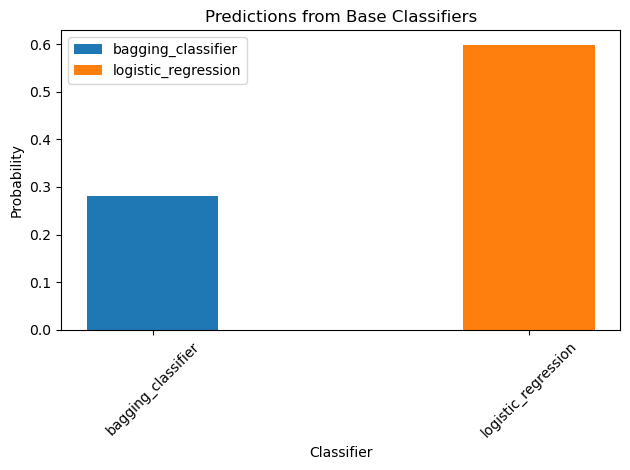

In [50]:
# Visualising the probability

probas = stacking_model.transform(sample_df)

classifier_names = [name for name, _ in base_classifiers]

bar_width = 0.35
index = np.arange(len(probas[0]))

fig, ax = plt.subplots()

for i, (name, proba) in enumerate(zip(classifier_names, probas[0])):
    ax.bar(i, proba, bar_width, label=name)

ax.set_xlabel('Classifier')
ax.set_ylabel('Probability')
ax.set_title('Predictions from Base Classifiers')
ax.set_xticks(index)
ax.set_xticklabels(classifier_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()